# Milestone 1 - EDA and Preprocessing data 

- Load dataset
- Explore the dataset and ask atleast 5 questions to give you a better understanding of the data provided to you. 
- Visualise the answer to these 5 questions.
- Cleaing the data
- Observe missing data and comment on why you believe it is missing(MCAR,MAR or MNAR) 
- Observe duplicate data
- Observe outliers
- After observing outliers,missing data and duplicates, handle any unclean data.
- With every change you are making to the data you need to comment on why you used this technique and how has it affected the data(by both showing the change in the data i.e change in number of rows/columns,change in distrubution, etc and commenting on it).
- Data transformation and feature engineering
- Add a new column named 'Week number' and discretisize the data into weeks according to the dates.Tip: Change the datatype of the date feature to datetime type instead of object.
- Encode any categorical feature(s) and comment on why you used this technique and how the data has changed.
- Identify feature(s) which need normalisation and show your reasoning.Then choose a technique to normalise the feature(s) and comment on why you chose this technique.
- Add atleast two more columns which adds more info to the dataset by evaluating specific feature(s). I.E( Column indicating whether the accident was on a weekend or not). 
- For any imputation with arbitrary values or encoding done, you have to store what the value imputed or encoded represents in a new csv file. I.e if you impute a missing value with -1 or 100 you must have a csv file illustrating what -1 and 100 means. Or for instance, if you encode cities with 1,2,3,4,etc what each number represents must be shown in the new csv file.
- Load the new dataset into a csv file.
- **Extremely Important note** - Your code should be as generic as possible and not hard-coded and be able to work with various datasets. Any hard-coded solutions will be severely penalised.
- Bonus: Load the dataset as a parquet file instead of a csv file(Parquet file is a compressed file format).

# 1 - Extraction

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn import preprocessing
import datetime

We loaded the dataset into Accidents_2016.

In [2]:
Accidents_2016 = pd.read_csv("2016_Accidents_UK.csv")
Accidents_2016.head(10)

C:\Users\DELL\AppData\Local\Temp\ipykernel_40524\125141729.py:1: DtypeWarning: Columns (35) have mixed types. Specify dtype option on import or set low_memory=False.
  Accidents_2016 = pd.read_csv("2016_Accidents_UK.csv")


,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,2016010000005,2016,010000005,519310.0,188730.0,-0.279323,51.584754,Metropolitan Police,Slight,2,...,No physical crossing facilities within 50 metres,Darkness - lights unlit,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01000543
1,2016010000006,2016,010000006,551920.0,174560.0,0.184928,51.449595,Metropolitan Police,Slight,1,...,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01000375
2,2016010000008,2016,010000008,505930.0,183850.0,-0.473837,51.543563,Metropolitan Police,Slight,1,...,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01033725
3,2016010000016,2016,010000016,527770.0,168930.0,-0.164442,51.404958,Metropolitan Police,Slight,1,...,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01003379
4,2016010000018,2016,010000018,510740.0,177230.0,-0.406580,51.483139,Metropolitan Police,Slight,2,...,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01002583
5,2016010000019,2016,010000019,530840.0,167100.0,-0.121004,51.387813,Metropolitan Police,Slight,2,...,Central refuge,Daylight,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01001180
6,2016010000020,2016,010000020,527610.0,181430.0,-0.162234,51.517333,Metropolitan Police,Slight,1,...,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01004658
7,2016010000021,2016,010000021,523830.0,189460.0,-0.213859,51.590341,Metropolitan Police,Slight,2,...,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01000243
8,2016010000023,2016,010000023,524640.0,180620.0,-0.205302,51.510716,Metropolitan Police,Slight,1,...,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01002875
9,2016010000024,2016,010000024,540670.0,174700.0,0.023193,51.453758,Metropolitan Police,Slight,2,...,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01001658


# 2- EDA

Question 1: Comparison between the number of accidents and road types. Visualization using Bar chart 

C:\Users\DELL\AppData\Local\Temp\ipykernel_40524\2685866823.py:4: UserWarning: 'set_params()' not defined for locator of type <class 'matplotlib.category.StrCategoryLocator'>
  plt.locator_params(integer=True)


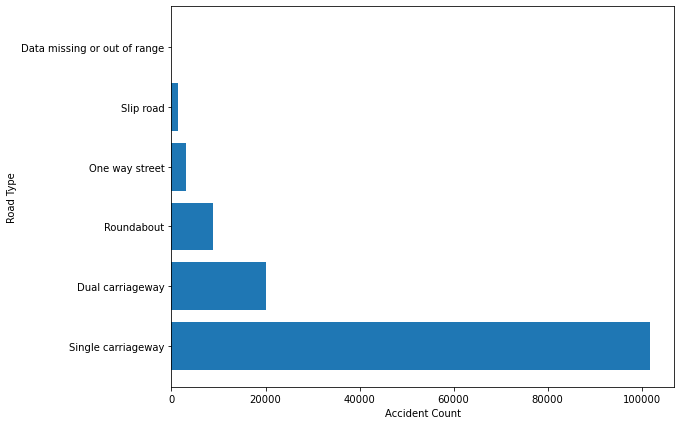

In [3]:
fig, ax = plt.subplots(figsize=(9, 7))
class_series = Accidents_2016.road_type.value_counts()
bar_plot = plt.barh(class_series.index, class_series)
plt.locator_params(integer=True)
plt.xlabel('Accident Count')
plt.ylabel('Road Type')
plt.show()





Question 2: What is the relationship between the number of vehicles and the number of casualties. Visualization using ScatterPlot 

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='number_of_vehicles', ylabel='number_of_casualties'>

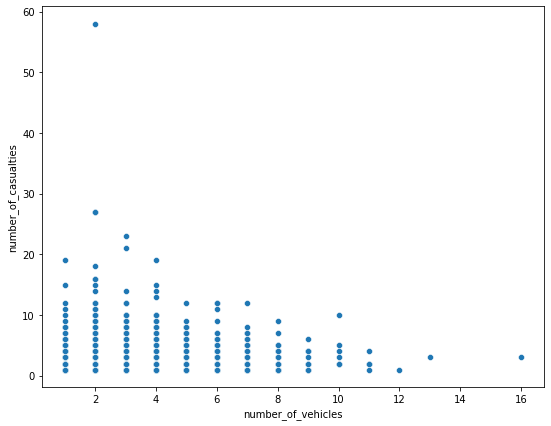

In [4]:
fig, ax = plt.subplots(figsize=(9, 7))
sns.scatterplot(Accidents_2016["number_of_vehicles"],Accidents_2016["number_of_casualties"])

Question 3: what is the relationship between the number of Weather Conditions and the count of accidents. Visualization using Bar chart 

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


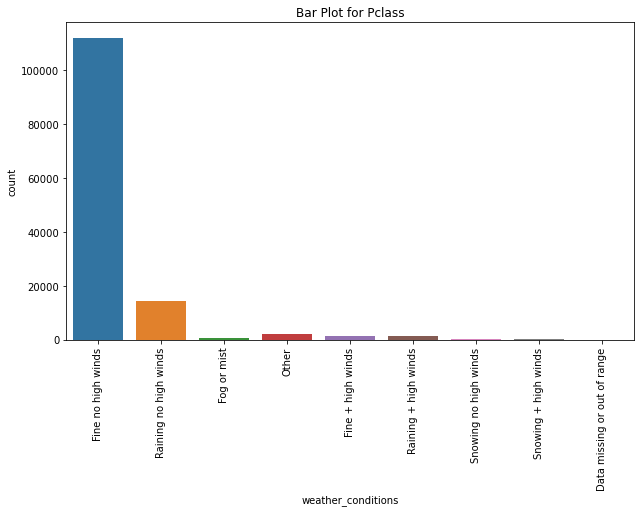

In [5]:
fig, ax = plt.subplots(figsize=(9, 7))
sns.countplot('weather_conditions',data=Accidents_2016 )
plt.xticks(rotation=90)
plt.tight_layout()
plt.title('Bar Plot for Pclass')
plt.show()

Question 4: what is the relationship between the junction detail and the count of accidents. Visualization using Bar chart 

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


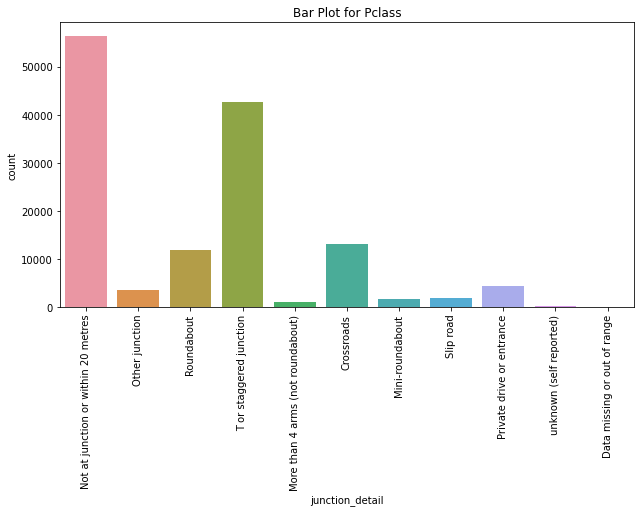

In [6]:
fig, ax = plt.subplots(figsize=(9, 7))
sns.countplot('junction_detail',data=Accidents_2016 )
plt.xticks(rotation=90)
plt.tight_layout()
plt.title('Bar Plot for Pclass')
plt.show()

Question 5: what is the frequency distribution between speed limit and serious Severity count. Visualization using Histogram chart 

In [7]:
df_severity = Accidents_2016[( Accidents_2016['speed_limit'].notnull()) & (Accidents_2016['accident_severity']=='Serious')]
sev_count = df_severity.speed_limit.value_counts()
sev_count


30.0    12061
60.0     4169
40.0     1865
70.0     1377
50.0     1014
20.0      989
Name: speed_limit, dtype: int64

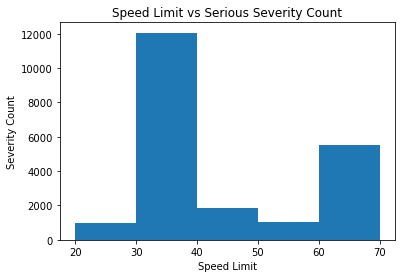

In [8]:
bins = range(int(df_severity.speed_limit.min()),int(df_severity.speed_limit.max())+1,10)
plt.xticks(bins)
plt.hist(df_severity.speed_limit,bins)
plt.xlabel('Speed Limit')
plt.ylabel('Severity Count')
plt.title('Speed Limit vs Serious Severity Count')
plt.show()

# 3 - Cleaning Data

## Observing Missing and duplicate Data

We counted the number of null values in each column

In [9]:
Accidents_2016.isnull().sum()

accident_index                                     0
accident_year                                      0
accident_reference                                 0
location_easting_osgr                              7
location_northing_osgr                             7
longitude                                          7
latitude                                           7
police_force                                       0
accident_severity                                  0
number_of_vehicles                                 0
number_of_casualties                               0
date                                               0
day_of_week                                        0
time                                               0
local_authority_district                           0
local_authority_ons_district                       0
local_authority_highway                            0
first_road_class                                   0
first_road_number                             

Weather Condition (MCAR) because the values are missing completely at random and there is nothing going on that makes some data more likely to be missing than other 

In [10]:
 Accidents_2016.weather_conditions.isnull().groupby(Accidents_2016["local_authority_district"]).mean()*100


local_authority_district
Aberdeen City     3.468208
Aberdeenshire     0.615385
Adur              3.546099
Allerdale        10.970464
Amber Valley     12.682927
                   ...    
Wychavon          0.813008
Wycombe           0.673401
Wyre              1.408451
Wyre Forest       0.000000
York              0.000000
Name: weather_conditions, Length: 380, dtype: float64

RoadType (MCAR) because the values are missing completely at random and there is nothing going on that makes some data more likely to be missing than other

In [11]:
 Accidents_2016.road_type.isnull().groupby(Accidents_2016["local_authority_district"]).mean()*100


local_authority_district
Aberdeen City    1.734104
Aberdeenshire    0.615385
Adur             0.000000
Allerdale        1.687764
Amber Valley     0.000000
                   ...   
Wychavon         0.813008
Wycombe          0.000000
Wyre             1.877934
Wyre Forest      0.000000
York             0.207900
Name: road_type, Length: 380, dtype: float64

Second Road Number(MNAR) because the number of missing values is huge and missing data is not at random

In [12]:
  Accidents_2016.second_road_number.isnull().groupby(Accidents_2016["local_authority_district"]).mean()*100


local_authority_district
Aberdeen City    39.306358
Aberdeenshire    63.076923
Adur             33.333333
Allerdale        70.886076
Amber Valley     55.121951
                   ...    
Wychavon         57.317073
Wycombe          42.087542
Wyre             44.600939
Wyre Forest      37.647059
York             36.382536
Name: second_road_number, Length: 380, dtype: float64

The dataset did not contain any duplicates

In [13]:
Accidents_2016.duplicated().sum()

0

In [14]:

duplicate = Accidents_2016[Accidents_2016.duplicated()]
print(duplicate)

Empty DataFrame
Columns: [accident_index, accident_year, accident_reference, location_easting_osgr, location_northing_osgr, longitude, latitude, police_force, accident_severity, number_of_vehicles, number_of_casualties, date, day_of_week, time, local_authority_district, local_authority_ons_district, local_authority_highway, first_road_class, first_road_number, road_type, speed_limit, junction_detail, junction_control, second_road_class, second_road_number, pedestrian_crossing_human_control, pedestrian_crossing_physical_facilities, light_conditions, weather_conditions, road_surface_conditions, special_conditions_at_site, carriageway_hazards, urban_or_rural_area, did_police_officer_attend_scene_of_accident, trunk_road_flag, lsoa_of_accident_location]
Index: []

[0 rows x 36 columns]


We copied the original dataset into a copy (Acccidents_2016_Copy) to avoid any damages in the original copy

In [15]:
Acccidents_2016_Copy=Accidents_2016.copy()
Acccidents_2016_Copy.columns

Index(['accident_index', 'accident_year', 'accident_reference',
       'location_easting_osgr', 'location_northing_osgr', 'longitude',
       'latitude', 'police_force', 'accident_severity', 'number_of_vehicles',
       'number_of_casualties', 'date', 'day_of_week', 'time',
       'local_authority_district', 'local_authority_ons_district',
       'local_authority_highway', 'first_road_class', 'first_road_number',
       'road_type', 'speed_limit', 'junction_detail', 'junction_control',
       'second_road_class', 'second_road_number',
       'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident',
       'trunk_road_flag', 'lsoa_of_accident_location'],
      dtype='object')

In [16]:
Accidents_2016.describe()

,accident_year,location_easting_osgr,location_northing_osgr,longitude,latitude,number_of_vehicles,number_of_casualties,speed_limit
count,136621.0,136614.000000,1.366140e+05,136614.000000,136614.000000,136621.000000,136621.000000,136584.000000
mean,2016.0,448699.363169,2.883354e+05,-1.304881,52.482399,1.848179,1.327644,37.943683
std,0.0,95230.253169,1.570588e+05,1.398947,1.414390,0.710117,0.789296,14.041669
min,2016.0,76702.000000,1.107500e+04,-7.389809,49.919716,1.000000,1.000000,20.000000
25%,2016.0,386355.750000,1.764248e+05,-2.204357,51.473779,1.000000,1.000000,30.000000
50%,2016.0,454126.000000,2.374855e+05,-1.201205,52.025165,2.000000,1.000000,30.000000
75%,2016.0,527660.000000,3.897438e+05,-0.159708,53.401675,2.000000,1.000000,40.000000
max,2016.0,655256.000000,1.178623e+06,1.757858,60.490191,16.000000,58.000000,70.000000


In the data cleaning , we were observing the outliers so we wanted to check the skew of the data

In [17]:
Accidents_2016.number_of_casualties.skew(),Accidents_2016.number_of_vehicles.skew()

(7.012843743819374, 1.575557053996515)

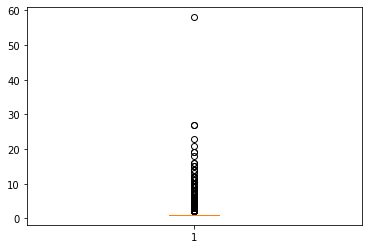

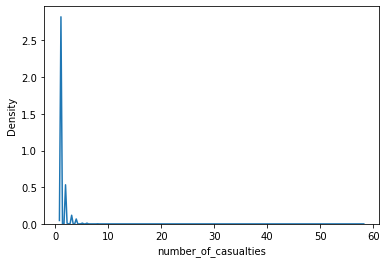

In [18]:
plt.boxplot(Accidents_2016.number_of_casualties)
plt.show()
sns.kdeplot(Accidents_2016.number_of_casualties)
plt.show()

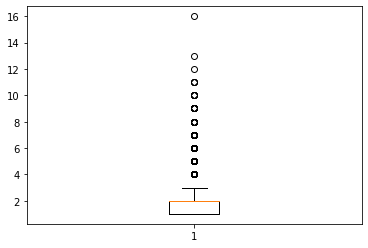

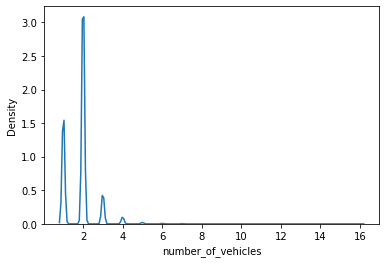

In [19]:
plt.boxplot(Accidents_2016.number_of_vehicles)
plt.show()
sns.kdeplot(Accidents_2016.number_of_vehicles)
plt.show()

## Handling Missing data

We dropped Second road Number because the number of missing values was 57007 
We dropped (local_authority_ons_district) and (local_authority_highway) because they were repeated columns.

In [20]:
Acccidents_2016_Copy.drop(['second_road_number','local_authority_ons_district', 'local_authority_highway'],inplace=True,axis=1)
# Acccidents_2016_Copy.drop( 'local_authority_ons_district',inplace=True,axis=1)
# Acccidents_2016_Copy.drop( 'local_authority_highway',inplace=True,axis=1)

In [21]:
# Acccidents_2016_Copy
Acccidents_2016_Copy.columns

Index(['accident_index', 'accident_year', 'accident_reference',
       'location_easting_osgr', 'location_northing_osgr', 'longitude',
       'latitude', 'police_force', 'accident_severity', 'number_of_vehicles',
       'number_of_casualties', 'date', 'day_of_week', 'time',
       'local_authority_district', 'first_road_class', 'first_road_number',
       'road_type', 'speed_limit', 'junction_detail', 'junction_control',
       'second_road_class', 'pedestrian_crossing_human_control',
       'pedestrian_crossing_physical_facilities', 'light_conditions',
       'weather_conditions', 'road_surface_conditions',
       'special_conditions_at_site', 'carriageway_hazards',
       'urban_or_rural_area', 'did_police_officer_attend_scene_of_accident',
       'trunk_road_flag', 'lsoa_of_accident_location'],
      dtype='object')

Checking the sum of null values in each column.

In [22]:

Acccidents_2016_Copy.isnull().sum()

accident_index                                    0
accident_year                                     0
accident_reference                                0
location_easting_osgr                             7
location_northing_osgr                            7
longitude                                         7
latitude                                          7
police_force                                      0
accident_severity                                 0
number_of_vehicles                                0
number_of_casualties                              0
date                                              0
day_of_week                                       0
time                                              0
local_authority_district                          0
first_road_class                                  0
first_road_number                                 0
road_type                                      1399
speed_limit                                      37
junction_det

We dropped rows in 'road_type' column were values are null since their total is less than 2%

In [23]:

Acccidents_2016_Copy1=Accidents_2016.copy()
Acccidents_2016_Copy1.dropna(axis=0,subset=['road_type'],inplace=True)
Acccidents_2016_Copy1.isnull().sum()

accident_index                                     0
accident_year                                      0
accident_reference                                 0
location_easting_osgr                              7
location_northing_osgr                             7
longitude                                          7
latitude                                           7
police_force                                       0
accident_severity                                  0
number_of_vehicles                                 0
number_of_casualties                               0
date                                               0
day_of_week                                        0
time                                               0
local_authority_district                           0
local_authority_ons_district                       0
local_authority_highway                            0
first_road_class                                   0
first_road_number                             

Their isnt any clear imputation method to be used
Does not give any useful information
Leaving this many null values will affect our analysis

In [24]:
Acccidents_2016_Copy1.drop(['second_road_number'],inplace=True,axis=1)

In [25]:
Acccidents_2016_Copy1.isnull().sum()

accident_index                                    0
accident_year                                     0
accident_reference                                0
location_easting_osgr                             7
location_northing_osgr                            7
longitude                                         7
latitude                                          7
police_force                                      0
accident_severity                                 0
number_of_vehicles                                0
number_of_casualties                              0
date                                              0
day_of_week                                       0
time                                              0
local_authority_district                          0
local_authority_ons_district                      0
local_authority_highway                           0
first_road_class                                  0
first_road_number                                 0
road_type   

Filled the null values with the mode of the column

In [26]:
Acccidents_2016_Copy1['weather_conditions'] = Acccidents_2016_Copy1['weather_conditions'].fillna(Acccidents_2016_Copy1['weather_conditions'].mode()[0])

In [27]:
Acccidents_2016_Copy1.isnull().sum()


accident_index                                  0
accident_year                                   0
accident_reference                              0
location_easting_osgr                           7
location_northing_osgr                          7
longitude                                       7
latitude                                        7
police_force                                    0
accident_severity                               0
number_of_vehicles                              0
number_of_casualties                            0
date                                            0
day_of_week                                     0
time                                            0
local_authority_district                        0
local_authority_ons_district                    0
local_authority_highway                         0
first_road_class                                0
first_road_number                               0
road_type                                       0


In [28]:
Acccidents_2016_Copy1['first_road_number'] = np.where(Acccidents_2016_Copy1['first_road_number']=='first_road_class is C or Unclassified. These roads do not have official numbers so recorded as zero ', 0, Acccidents_2016_Copy1['first_road_number'])


## Findings and conclusions

## Observing outliers

We observed the outliers using IQR method for number_of_vehicles column and  number_of_casualties column

In [29]:
Q1 = Acccidents_2016_Copy1.number_of_vehicles.quantile(0.25)
Q3 = Acccidents_2016_Copy1.number_of_vehicles.quantile(0.75)
IQR = Q3 - Q1
print(IQR)


1.0


In [30]:
cut_off = IQR * 1.5
lower = Q1 - cut_off
upper =  Q3 + cut_off
print(lower,upper)


-0.5 3.5


In [31]:
df1 = Acccidents_2016_Copy1[Acccidents_2016_Copy1['number_of_vehicles']> upper]
df2 = Acccidents_2016_Copy1[Acccidents_2016_Copy1['number_of_vehicles'] < lower]
print('Total number of outliers are', df1.shape[0]+ df2.shape[0])


Total number of outliers are 3224


In [32]:
Q1 = Acccidents_2016_Copy1.number_of_casualties.quantile(0.25)
Q3 = Acccidents_2016_Copy1.number_of_casualties.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

0.0


In [33]:
cut_off = IQR * 1.5
lower1 = Q1 - cut_off
upper1 =  Q3 + cut_off
print(lower,upper)

-0.5 3.5


In [34]:
df1 = Acccidents_2016_Copy1[Acccidents_2016_Copy1['number_of_casualties']> upper1]
df2 = Acccidents_2016_Copy1[Acccidents_2016_Copy1['number_of_casualties'] < lower1]
print('Total number of outliers are', df1.shape[0]+ df2.shape[0])

Total number of outliers are 29630


## Handling outliers

In [35]:
# df_Acccidents_2016_Copy1 = (Acccidents_2016_Copy1[(Acccidents_2016_Copy1['number_of_vehicles'].notnull()) & (Acccidents_2016_Copy1['weather_conditions'])])
class_series = Acccidents_2016_Copy1.groupby(['weather_conditions'])['number_of_vehicles'].mean()

class_series

weather_conditions
Data missing or out of range    1.846154
Fine + high winds               1.813152
Fine no high winds              1.860622
Fog or mist                     1.709634
Other                           1.776011
Raining + high winds            1.690459
Raining no high winds           1.803965
Snowing + high winds            1.756410
Snowing no high winds           1.776812
Name: number_of_vehicles, dtype: float64

In [36]:
# cutoff =round(Acccidents_2016_Copy1.number_of_vehicles.mean() + Acccidents_2016_Copy1.number_of_vehicles.std() * 3)
# cutoff

In [37]:
# imp = Acccidents_2016_Copy1.copy()

# median = Acccidents_2016_Copy1.number_of_vehicles.median()
# print(median)

# imp["number_of_vehicles"] = np.where(imp["number_of_vehicles"]>cutoff, median,imp['number_of_vehicles'])


In [38]:
# df1 = imp[imp['number_of_vehicles']> upper]
# df2 = imp[imp['number_of_vehicles'] < lower]
# print('Total number of outliers are', df1.shape[0]+ df2.shape[0])


In [39]:
# cutoff =round(imp.number_of_casualties.mean() + imp.number_of_casualties.std() * 3)
# cutoff

In [40]:
# imp1 = imp.copy()

# median = imp.number_of_casualties.median()
# print(median)

# imp1["number_of_casualties"] = np.where(imp1["number_of_casualties"]>cutoff, median,imp1['number_of_casualties'])

In [41]:
# df1 = imp1[imp1['number_of_casualties']> upper1]
# df2 = imp1[imp1['number_of_casualties'] < lower1]
# print('Total number of outliers are', df1.shape[0]+ df2.shape[0])

We handled outliers using the quantile based flooring and capping for columns 

In [42]:
floor = Acccidents_2016_Copy1['number_of_vehicles'].quantile(0.10)
cap = Acccidents_2016_Copy1['number_of_vehicles'].quantile(0.90)
floor,cap

(1.0, 3.0)

In [43]:
imp = Acccidents_2016_Copy1.copy()
imp["number_of_vehicles"] = np.where(imp["number_of_vehicles"] <floor, floor,imp['number_of_vehicles'])
imp["number_of_vehicles"] = np.where(imp["number_of_vehicles"] >cap,cap,imp['number_of_vehicles'])

In [44]:
df1 = imp[imp['number_of_vehicles']> upper]
df2 = imp[imp['number_of_vehicles'] < lower]
print('Total number of outliers are', df1.shape[0]+ df2.shape[0])

Total number of outliers are 0


In [45]:
imp.shape

(135222, 35)

In [46]:
Acccidents_2016_Copy1.shape

(135222, 35)

In [47]:
cutoff =round(imp.number_of_casualties.mean() + imp.number_of_casualties.std() * 3)
cutoff

4

In [48]:
imp1 = imp.copy()
median = imp.number_of_casualties.median()
print(median)
imp1["number_of_casualties"] = np.where(imp1["number_of_casualties"]>cutoff, median,imp1['number_of_casualties'])

1.0


In [49]:
df1 = imp1[imp1['number_of_casualties']> upper1]
df2 = imp1[imp1['number_of_casualties'] < lower1]
print('Total number of outliers are', df1.shape[0]+ df2.shape[0])

Total number of outliers are 28398


In [50]:
floor1 = imp1['number_of_casualties'].quantile(0.10)
cap1 = imp1['number_of_casualties'].quantile(0.80)
floor,cap

(1.0, 3.0)

In [51]:
imp2 = imp1.copy()
imp2["number_of_casualties"] = np.where(imp2["number_of_casualties"] <floor1, floor1,imp2['number_of_casualties'])
imp2["number_of_casualties"] = np.where(imp2["number_of_casualties"] >cap1,cap1,imp2['number_of_casualties'])

In [52]:
df1 = imp2[imp2['number_of_casualties']> upper1+2]
df2 = imp2[imp2['number_of_casualties'] < lower1]
print('Total number of outliers are', df1.shape[0]+ df2.shape[0])

Total number of outliers are 0


## Findings and conclusions

In [53]:
imp.shape

(135222, 35)

In [54]:
imp2.shape

(135222, 35)

In [55]:
imp2['number_of_casualties'].max()

2.0

In [56]:
imp2

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,accident_severity,number_of_vehicles,...,pedestrian_crossing_physical_facilities,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location
0,2016010000005,2016,010000005,519310.0,188730.0,-0.279323,51.584754,Metropolitan Police,Slight,2.0,...,No physical crossing facilities within 50 metres,Darkness - lights unlit,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01000543
1,2016010000006,2016,010000006,551920.0,174560.0,0.184928,51.449595,Metropolitan Police,Slight,1.0,...,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01000375
2,2016010000008,2016,010000008,505930.0,183850.0,-0.473837,51.543563,Metropolitan Police,Slight,1.0,...,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01033725
3,2016010000016,2016,010000016,527770.0,168930.0,-0.164442,51.404958,Metropolitan Police,Slight,1.0,...,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01003379
4,2016010000018,2016,010000018,510740.0,177230.0,-0.406580,51.483139,Metropolitan Police,Slight,2.0,...,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01002583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136616,2016984130916,2016,984130916,319273.0,574564.0,-3.265390,55.058998,Dumfries and Galloway,Slight,2.0,...,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Wet or damp,None,None,Rural,Yes,Data missing or out of range,-1
136617,2016984131116,2016,984131116,316143.0,568615.0,-3.312631,55.005033,Dumfries and Galloway,Slight,2.0,...,No physical crossing facilities within 50 metres,Daylight,Fine no high winds,Dry,None,None,Rural,Yes,Data missing or out of range,-1
136618,2016984131216,2016,984131216,322903.0,573365.0,-3.208249,55.048803,Dumfries and Galloway,Slight,1.0,...,No physical crossing facilities within 50 metres,Darkness - no lighting,Fine no high winds,Wet or damp,None,None,Rural,Yes,Data missing or out of range,-1
136619,2016984131316,2016,984131316,318673.0,566850.0,-3.272584,54.989597,Dumfries and Galloway,Slight,1.0,...,No physical crossing facilities within 50 metres,Darkness - lights lit,Fine no high winds,Dry,None,None,Rural,Yes,Data missing or out of range,-1


# 4 - Data transformation

One hot encoding for accident severity because they was two values

In [57]:
encoded_severity = imp2.copy()
imp2['accident_severity'].unique()
#array(['Slight', 'Serious'], dtype=object)
dummy1 = pd.get_dummies(encoded_severity['accident_severity'], drop_first=True)
dummy1.head()
encoded_severity = pd.concat([encoded_severity, dummy1], axis=1).drop('accident_severity', axis=1)
encoded_severity.head()



,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,number_of_vehicles,number_of_casualties,...,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,Serious,Slight
0,2016010000005,2016,010000005,519310.0,188730.0,-0.279323,51.584754,Metropolitan Police,2.0,1.0,...,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01000543,0,1
1,2016010000006,2016,010000006,551920.0,174560.0,0.184928,51.449595,Metropolitan Police,1.0,1.0,...,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01000375,0,1
2,2016010000008,2016,010000008,505930.0,183850.0,-0.473837,51.543563,Metropolitan Police,1.0,1.0,...,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01033725,0,1
3,2016010000016,2016,010000016,527770.0,168930.0,-0.164442,51.404958,Metropolitan Police,1.0,1.0,...,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01003379,0,1
4,2016010000018,2016,010000018,510740.0,177230.0,-0.406580,51.483139,Metropolitan Police,2.0,1.0,...,Fine no high winds,Dry,None,None,Urban,Yes,Non-trunk,E01002583,0,1


One hot Encoding because they were 3 values

In [58]:

encoded_urban = encoded_severity.copy()
encoded_severity['urban_or_rural_area'].unique()
#array(['Slight', 'Serious'], dtype=object)
dummy1 = pd.get_dummies(encoded_urban['urban_or_rural_area'], drop_first=False)
dummy1.head()
encoded_urban = pd.concat([encoded_urban, dummy1], axis=1).drop('urban_or_rural_area', axis=1)
encoded_urban.head()


,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,number_of_vehicles,number_of_casualties,...,special_conditions_at_site,carriageway_hazards,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,Serious,Slight,Rural,Unallocated,Urban
0,2016010000005,2016,010000005,519310.0,188730.0,-0.279323,51.584754,Metropolitan Police,2.0,1.0,...,None,None,Yes,Non-trunk,E01000543,0,1,0,0,1
1,2016010000006,2016,010000006,551920.0,174560.0,0.184928,51.449595,Metropolitan Police,1.0,1.0,...,None,None,Yes,Non-trunk,E01000375,0,1,0,0,1
2,2016010000008,2016,010000008,505930.0,183850.0,-0.473837,51.543563,Metropolitan Police,1.0,1.0,...,None,None,Yes,Non-trunk,E01033725,0,1,0,0,1
3,2016010000016,2016,010000016,527770.0,168930.0,-0.164442,51.404958,Metropolitan Police,1.0,1.0,...,None,None,Yes,Non-trunk,E01003379,0,1,0,0,1
4,2016010000018,2016,010000018,510740.0,177230.0,-0.406580,51.483139,Metropolitan Police,2.0,1.0,...,None,None,Yes,Non-trunk,E01002583,0,1,0,0,1


In [59]:
encoded_severity['urban_or_rural_area'].unique()
dummy1.head()
encoded_urban.shape


(135222, 38)

We used the .unique() function to help us decide if there are alot of values. if there were alot of values we used label  if not One hot encoded 

In [60]:
#label
encoded_road_surface = encoded_urban.copy()
encoded_urban['road_surface_conditions'].unique()


array(['Dry', 'Wet or damp', 'Data missing or out of range',
       'Flood over 3cm. deep', 'Frost or ice', 'Snow',
       'unknown (self reported)'], dtype=object)

we counted the -1 and unclassified values and they were 110000 which is the majority of the dataset so we decided to drop the column since we considered that -1 values are null values

In [61]:
encoded_urban.drop(['second_road_class'],inplace=True,axis=1)

In [62]:
encoded_urban["first_road_number"]

0         4006
1          207
2         4020
3          217
4          312
          ... 
136616    7076
136617    7020
136618      74
136619     724
136620      74
Name: first_road_number, Length: 135222, dtype: object

In [63]:
encoded_urban2=encoded_urban.copy()

In [64]:
encoded_urban2.drop(['first_road_number'],inplace=True,axis=1)

In [65]:
encoded_urban.dtypes


accident_index                                  object
accident_year                                    int64
accident_reference                              object
location_easting_osgr                          float64
location_northing_osgr                         float64
longitude                                      float64
latitude                                       float64
police_force                                    object
number_of_vehicles                             float64
number_of_casualties                           float64
date                                            object
day_of_week                                     object
time                                            object
local_authority_district                        object
local_authority_ons_district                    object
local_authority_highway                         object
first_road_class                                object
first_road_number                               object
road_type 

In [66]:
encoded_urban.head()

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,number_of_vehicles,number_of_casualties,...,special_conditions_at_site,carriageway_hazards,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,Serious,Slight,Rural,Unallocated,Urban
0,2016010000005,2016,010000005,519310.0,188730.0,-0.279323,51.584754,Metropolitan Police,2.0,1.0,...,None,None,Yes,Non-trunk,E01000543,0,1,0,0,1
1,2016010000006,2016,010000006,551920.0,174560.0,0.184928,51.449595,Metropolitan Police,1.0,1.0,...,None,None,Yes,Non-trunk,E01000375,0,1,0,0,1
2,2016010000008,2016,010000008,505930.0,183850.0,-0.473837,51.543563,Metropolitan Police,1.0,1.0,...,None,None,Yes,Non-trunk,E01033725,0,1,0,0,1
3,2016010000016,2016,010000016,527770.0,168930.0,-0.164442,51.404958,Metropolitan Police,1.0,1.0,...,None,None,Yes,Non-trunk,E01003379,0,1,0,0,1
4,2016010000018,2016,010000018,510740.0,177230.0,-0.406580,51.483139,Metropolitan Police,2.0,1.0,...,None,None,Yes,Non-trunk,E01002583,0,1,0,0,1


label_encoder object knows how to understand word labels.
 Encode labels in column 'species'.

In [67]:
#label
  

label_encoder = preprocessing.LabelEncoder()
  

encoded_urban['carriageway_hazards']= label_encoder.fit_transform(encoded_urban['carriageway_hazards'])
  
encoded_urban['carriageway_hazards'].unique()

array([2, 3, 4, 6, 7, 0, 5, 1])

In [68]:
encoded_urban

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,number_of_vehicles,number_of_casualties,...,special_conditions_at_site,carriageway_hazards,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,Serious,Slight,Rural,Unallocated,Urban
0,2016010000005,2016,010000005,519310.0,188730.0,-0.279323,51.584754,Metropolitan Police,2.0,1.0,...,None,2,Yes,Non-trunk,E01000543,0,1,0,0,1
1,2016010000006,2016,010000006,551920.0,174560.0,0.184928,51.449595,Metropolitan Police,1.0,1.0,...,None,2,Yes,Non-trunk,E01000375,0,1,0,0,1
2,2016010000008,2016,010000008,505930.0,183850.0,-0.473837,51.543563,Metropolitan Police,1.0,1.0,...,None,2,Yes,Non-trunk,E01033725,0,1,0,0,1
3,2016010000016,2016,010000016,527770.0,168930.0,-0.164442,51.404958,Metropolitan Police,1.0,1.0,...,None,2,Yes,Non-trunk,E01003379,0,1,0,0,1
4,2016010000018,2016,010000018,510740.0,177230.0,-0.406580,51.483139,Metropolitan Police,2.0,1.0,...,None,2,Yes,Non-trunk,E01002583,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136616,2016984130916,2016,984130916,319273.0,574564.0,-3.265390,55.058998,Dumfries and Galloway,2.0,1.0,...,None,2,Yes,Data missing or out of range,-1,0,1,1,0,0
136617,2016984131116,2016,984131116,316143.0,568615.0,-3.312631,55.005033,Dumfries and Galloway,2.0,2.0,...,None,2,Yes,Data missing or out of range,-1,0,1,1,0,0
136618,2016984131216,2016,984131216,322903.0,573365.0,-3.208249,55.048803,Dumfries and Galloway,1.0,1.0,...,None,2,Yes,Data missing or out of range,-1,0,1,1,0,0
136619,2016984131316,2016,984131316,318673.0,566850.0,-3.272584,54.989597,Dumfries and Galloway,1.0,2.0,...,None,2,Yes,Data missing or out of range,-1,0,1,1,0,0


We used .unique() function to check the number if unique values.Found out that their was many unique values therefore we used label method

In [69]:
#label
encoded_urban['special_conditions_at_site'].unique()
encoded_urban['special_conditions_at_site']= label_encoder.fit_transform(encoded_urban['special_conditions_at_site'])
  
encoded_urban['special_conditions_at_site'].unique()

array([3, 7, 1, 8, 6, 4, 2, 5, 0])

In [70]:
#label
encoded_urban['weather_conditions'].unique()


array(['Fine no high winds', 'Raining no high winds', 'Fog or mist',
       'Other', 'Fine + high winds', 'Raining + high winds',
       'Snowing no high winds', 'Snowing + high winds',
       'Data missing or out of range'], dtype=object)

In [71]:
#label
encoded_urban['light_conditions'].unique()



array(['Darkness - lights unlit', 'Darkness - lights lit', 'Daylight',
       'Darkness - no lighting', 'Darkness - lighting unknown',
       'Data missing or out of range'], dtype=object)

In [72]:
#label
encoded_urban['pedestrian_crossing_physical_facilities'].unique()


array(['No physical crossing facilities within 50 metres',
       'Central refuge',
       'Pelican, puffin, toucan or similar non-junction pedestrian light crossing',
       'Pedestrian phase at traffic signal junction', 'Zebra',
       'unknown (self reported)', 'Footbridge or subway',
       'Data missing or out of range'], dtype=object)

In [73]:
#label
encoded_urban['pedestrian_crossing_human_control'].unique()


array(['None within 50 metres ', 'Control by other authorised person',
       'Control by school crossing patrol',
       'Data missing or out of range', 'unknown (self reported)'],
      dtype=object)

## 4.1 - Discretization

In [74]:
 encoded_urban.head(100)


,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,number_of_vehicles,number_of_casualties,...,special_conditions_at_site,carriageway_hazards,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,Serious,Slight,Rural,Unallocated,Urban
0,2016010000005,2016,010000005,519310.0,188730.0,-0.279323,51.584754,Metropolitan Police,2.0,1.0,...,3,2,Yes,Non-trunk,E01000543,0,1,0,0,1
1,2016010000006,2016,010000006,551920.0,174560.0,0.184928,51.449595,Metropolitan Police,1.0,1.0,...,3,2,Yes,Non-trunk,E01000375,0,1,0,0,1
2,2016010000008,2016,010000008,505930.0,183850.0,-0.473837,51.543563,Metropolitan Police,1.0,1.0,...,3,2,Yes,Non-trunk,E01033725,0,1,0,0,1
3,2016010000016,2016,010000016,527770.0,168930.0,-0.164442,51.404958,Metropolitan Police,1.0,1.0,...,3,2,Yes,Non-trunk,E01003379,0,1,0,0,1
4,2016010000018,2016,010000018,510740.0,177230.0,-0.406580,51.483139,Metropolitan Police,2.0,1.0,...,3,2,Yes,Non-trunk,E01002583,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2016010000180,2016,010000180,539410.0,170600.0,0.003458,51.417226,Metropolitan Police,1.0,1.0,...,3,3,Yes,Non-trunk,E01000672,0,1,0,0,1
96,2016010000181,2016,010000181,534740.0,181310.0,-0.059580,51.514600,Metropolitan Police,2.0,1.0,...,3,2,Yes,Non-trunk,E01004304,1,0,0,0,1
97,2016010000182,2016,010000182,532540.0,176730.0,-0.092986,51.473961,Metropolitan Police,2.0,1.0,...,3,2,Yes,Non-trunk,E01003921,1,0,0,0,1
98,2016010000183,2016,010000183,526000.0,178780.0,-0.186371,51.493878,Metropolitan Police,2.0,1.0,...,3,2,Yes,Non-trunk,E01002839,0,1,0,0,1


Converted the date column into datetime

In [75]:
#encoded_urban["date"] = pd.to_datetime(encoded_urban["date"])
# encoded_urban['date'] = pd.to_datetime(encoded_urban['date'], format='%d%m%y')
encoded_urban["date"] = pd.to_datetime(encoded_urban["date"])

C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13/11/2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '14/11/2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '15/11/2016' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\DELL\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '16/11/2016' in DD/MM/YYYY format. Provide format or specify in

In [76]:
df=encoded_urban['date'].dt.isocalendar().week

#encoded_urban.insert(35, "Week Number", df, True)
#encoded_urban.drop(['Week_number','Week Number'],inplace=True,axis=1)
#encoded_urban = pd.concat([encoded_urban, dummy1], axis=1).drop('urban_or_rural_area', axis=1)
#dates.dt.isocalendar().week



In [77]:
df

0          2
1          2
2          2
3          2
4          2
          ..
136616    43
136617     2
136618    43
136619    43
136620    51
Name: week, Length: 135222, dtype: UInt32

We inserted the Week Number Column 

In [78]:
# encoded_urban.insert(35, "Week Number", df, True)
encoded_urban.insert(loc=35,column='Week Number',value=df)

In [79]:
encoded_urban

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,number_of_vehicles,number_of_casualties,...,carriageway_hazards,did_police_officer_attend_scene_of_accident,trunk_road_flag,lsoa_of_accident_location,Serious,Slight,Rural,Week Number,Unallocated,Urban
0,2016010000005,2016,010000005,519310.0,188730.0,-0.279323,51.584754,Metropolitan Police,2.0,1.0,...,2,Yes,Non-trunk,E01000543,0,1,0,2,0,1
1,2016010000006,2016,010000006,551920.0,174560.0,0.184928,51.449595,Metropolitan Police,1.0,1.0,...,2,Yes,Non-trunk,E01000375,0,1,0,2,0,1
2,2016010000008,2016,010000008,505930.0,183850.0,-0.473837,51.543563,Metropolitan Police,1.0,1.0,...,2,Yes,Non-trunk,E01033725,0,1,0,2,0,1
3,2016010000016,2016,010000016,527770.0,168930.0,-0.164442,51.404958,Metropolitan Police,1.0,1.0,...,2,Yes,Non-trunk,E01003379,0,1,0,2,0,1
4,2016010000018,2016,010000018,510740.0,177230.0,-0.406580,51.483139,Metropolitan Police,2.0,1.0,...,2,Yes,Non-trunk,E01002583,0,1,0,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136616,2016984130916,2016,984130916,319273.0,574564.0,-3.265390,55.058998,Dumfries and Galloway,2.0,1.0,...,2,Yes,Data missing or out of range,-1,0,1,1,43,0,0
136617,2016984131116,2016,984131116,316143.0,568615.0,-3.312631,55.005033,Dumfries and Galloway,2.0,2.0,...,2,Yes,Data missing or out of range,-1,0,1,1,2,0,0
136618,2016984131216,2016,984131216,322903.0,573365.0,-3.208249,55.048803,Dumfries and Galloway,1.0,1.0,...,2,Yes,Data missing or out of range,-1,0,1,1,43,0,0
136619,2016984131316,2016,984131316,318673.0,566850.0,-3.272584,54.989597,Dumfries and Galloway,1.0,2.0,...,2,Yes,Data missing or out of range,-1,0,1,1,43,0,0


## 4.11 - Findings and conclusions

## 4.2 - Encoding

Checking the day if it is weekday or in the weekend

In [80]:
encoded_urban["date"] = pd.to_datetime(encoded_urban["date"])
encoded_urban["date"] 
sf = encoded_urban["date"].dt.weekday
sf

0         0
1         0
2         0
3         0
4         0
         ..
136616    4
136617    0
136618    3
136619    5
136620    6
Name: date, Length: 135222, dtype: int64

In [81]:
bf = sf >= 5
bf

0         False
1         False
2         False
3         False
4         False
          ...  
136616    False
136617    False
136618    False
136619     True
136620     True
Name: date, Length: 135222, dtype: bool

In [82]:
encoded_urban.insert(36, "Is Weekend", bf, True)
#encoded_urban.drop(["Is Weekend"],inplace=True,axis=1)

## 4.22 - Findings and conlcusions

We created the Coordinates column using the longitude and latitude columns

In [83]:
encoded_urban["Coordinates"] = " "
encoded_urban["Coordinates"]=str(encoded_urban['longitude']).replace('\n1','')+","+str(encoded_urban['latitude']).replace('\n2','')+""
# encoded_urban['period'] = encoded_urban[['longitude', 'latitude', ...]].agg('-'.join, axis=1)


In [84]:
encoded_urban["Coordinates"]

0         0        -0.279323         0.184928\n2        ...
1         0        -0.279323         0.184928\n2        ...
2         0        -0.279323         0.184928\n2        ...
3         0        -0.279323         0.184928\n2        ...
4         0        -0.279323         0.184928\n2        ...
                                ...                        
136616    0        -0.279323         0.184928\n2        ...
136617    0        -0.279323         0.184928\n2        ...
136618    0        -0.279323         0.184928\n2        ...
136619    0        -0.279323         0.184928\n2        ...
136620    0        -0.279323         0.184928\n2        ...
Name: Coordinates, Length: 135222, dtype: object

In [85]:
encoded_urban

,accident_index,accident_year,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,number_of_vehicles,number_of_casualties,...,trunk_road_flag,lsoa_of_accident_location,Serious,Slight,Rural,Week Number,Is Weekend,Unallocated,Urban,Coordinates
0,2016010000005,2016,010000005,519310.0,188730.0,-0.279323,51.584754,Metropolitan Police,2.0,1.0,...,Non-trunk,E01000543,0,1,0,2,False,0,1,0 -0.279323 0.184928\n2 ...
1,2016010000006,2016,010000006,551920.0,174560.0,0.184928,51.449595,Metropolitan Police,1.0,1.0,...,Non-trunk,E01000375,0,1,0,2,False,0,1,0 -0.279323 0.184928\n2 ...
2,2016010000008,2016,010000008,505930.0,183850.0,-0.473837,51.543563,Metropolitan Police,1.0,1.0,...,Non-trunk,E01033725,0,1,0,2,False,0,1,0 -0.279323 0.184928\n2 ...
3,2016010000016,2016,010000016,527770.0,168930.0,-0.164442,51.404958,Metropolitan Police,1.0,1.0,...,Non-trunk,E01003379,0,1,0,2,False,0,1,0 -0.279323 0.184928\n2 ...
4,2016010000018,2016,010000018,510740.0,177230.0,-0.406580,51.483139,Metropolitan Police,2.0,1.0,...,Non-trunk,E01002583,0,1,0,2,False,0,1,0 -0.279323 0.184928\n2 ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136616,2016984130916,2016,984130916,319273.0,574564.0,-3.265390,55.058998,Dumfries and Galloway,2.0,1.0,...,Data missing or out of range,-1,0,1,1,43,False,0,0,0 -0.279323 0.184928\n2 ...
136617,2016984131116,2016,984131116,316143.0,568615.0,-3.312631,55.005033,Dumfries and Galloway,2.0,2.0,...,Data missing or out of range,-1,0,1,1,2,False,0,0,0 -0.279323 0.184928\n2 ...
136618,2016984131216,2016,984131216,322903.0,573365.0,-3.208249,55.048803,Dumfries and Galloway,1.0,1.0,...,Data missing or out of range,-1,0,1,1,43,False,0,0,0 -0.279323 0.184928\n2 ...
136619,2016984131316,2016,984131316,318673.0,566850.0,-3.272584,54.989597,Dumfries and Galloway,1.0,2.0,...,Data missing or out of range,-1,0,1,1,43,True,0,0,0 -0.279323 0.184928\n2 ...


## 4.3 - Normalisation 

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Normalized data')

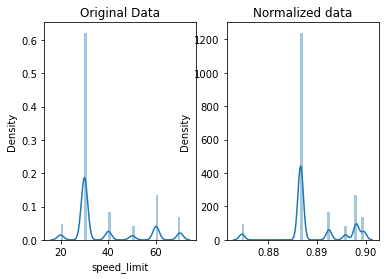

In [86]:
from scipy import stats
index_of_positive_pledges = encoded_urban.speed_limit > 0
# get only positive pledges (using their indexes)
positive_pledges = encoded_urban.speed_limit.loc[index_of_positive_pledges]

# normalize the pledges (w/ Box-Cox)
normalized_pledges = stats.boxcox(positive_pledges)[0]
# plot both together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(positive_pledges, ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(normalized_pledges, ax=ax[1])
ax[1].set_title("Normalized data")

We tried to normalize the SpeedLimit Column However it gave the same graph with smaller values.

## 4.31 - Findings and conclusions

## 4.4 - Adding more columns

## 4.41 - Findings and concluisons

## 4.5 - Csv file for lookup

## 5- Exporting the dataframe to a csv file or parquet

Exporting the Final dataframe.

In [87]:
encoded_urban.to_csv('UpdatedDataSet.csv')

In [89]:
Casualties_2016 = pd.read_csv("dft-road-casualty-statistics-vehicle-2016.csv")

In [91]:
merged = pd.merge(encoded_urban,Casualties_2016, on='accident_reference')

In [92]:
merged

,accident_index_x,accident_year_x,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,number_of_vehicles,number_of_casualties,...,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type
0,2016010000005,2016,010000005,519310.0,188730.0,-0.279323,51.584754,Metropolitan Police,2.0,1.0,...,1,1,51,8,-1,-1,-1,-1,3,1
1,2016010000005,2016,010000005,519310.0,188730.0,-0.279323,51.584754,Metropolitan Police,2.0,1.0,...,6,1,23,5,124,1,4,-1,4,1
2,2016010000006,2016,010000006,551920.0,174560.0,0.184928,51.449595,Metropolitan Police,1.0,1.0,...,6,2,36,7,1461,2,1,-1,10,1
3,2016010000008,2016,010000008,505930.0,183850.0,-0.473837,51.543563,Metropolitan Police,1.0,1.0,...,6,1,24,5,1390,1,5,-1,8,1
4,2016010000016,2016,010000016,527770.0,168930.0,-0.164442,51.404958,Metropolitan Police,1.0,1.0,...,1,1,55,8,6692,2,7,-1,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250150,2016984131116,2016,984131116,316143.0,568615.0,-3.312631,55.005033,Dumfries and Galloway,2.0,2.0,...,6,2,24,5,1598,1,14,-1,1,1
250151,2016984131116,2016,984131116,316143.0,568615.0,-3.312631,55.005033,Dumfries and Galloway,2.0,2.0,...,2,2,62,9,1598,2,0,-1,9,2
250152,2016984131216,2016,984131216,322903.0,573365.0,-3.208249,55.048803,Dumfries and Galloway,1.0,1.0,...,1,1,61,9,-1,-1,-1,-1,3,1
250153,2016984131316,2016,984131316,318673.0,566850.0,-3.272584,54.989597,Dumfries and Galloway,1.0,2.0,...,6,1,17,4,1796,1,13,-1,6,1


In [94]:
merged.to_csv('merged.csv')

In [107]:
endf_merged = pd.merge(encoded_urban, Casualties_2016, on=['accident_index','accident_reference'], how='left')

In [102]:
endf_merged

,accident_index,accident_year_x,accident_reference_x,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,number_of_vehicles,number_of_casualties,...,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type
0,2016010000005,2016,010000005,519310.0,188730.0,-0.279323,51.584754,Metropolitan Police,2.0,1.0,...,1,1,51,8,-1,-1,-1,-1,3,1
1,2016010000005,2016,010000005,519310.0,188730.0,-0.279323,51.584754,Metropolitan Police,2.0,1.0,...,6,1,23,5,124,1,4,-1,4,1
2,2016010000006,2016,010000006,551920.0,174560.0,0.184928,51.449595,Metropolitan Police,1.0,1.0,...,6,2,36,7,1461,2,1,-1,10,1
3,2016010000008,2016,010000008,505930.0,183850.0,-0.473837,51.543563,Metropolitan Police,1.0,1.0,...,6,1,24,5,1390,1,5,-1,8,1
4,2016010000016,2016,010000016,527770.0,168930.0,-0.164442,51.404958,Metropolitan Police,1.0,1.0,...,1,1,55,8,6692,2,7,-1,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250150,2016984131116,2016,984131116,316143.0,568615.0,-3.312631,55.005033,Dumfries and Galloway,2.0,2.0,...,6,2,24,5,1598,1,14,-1,1,1
250151,2016984131116,2016,984131116,316143.0,568615.0,-3.312631,55.005033,Dumfries and Galloway,2.0,2.0,...,2,2,62,9,1598,2,0,-1,9,2
250152,2016984131216,2016,984131216,322903.0,573365.0,-3.208249,55.048803,Dumfries and Galloway,1.0,1.0,...,1,1,61,9,-1,-1,-1,-1,3,1
250153,2016984131316,2016,984131316,318673.0,566850.0,-3.272584,54.989597,Dumfries and Galloway,1.0,2.0,...,6,1,17,4,1796,1,13,-1,6,1


In [108]:
endf_merged["accident_index"].isnull().sum()

0

In [109]:
duplicateRows = endf_merged[endf_merged.duplicated()]

In [116]:
duplicateRows.count()

accident_index            0
accident_year_x           0
accident_reference        0
location_easting_osgr     0
location_northing_osgr    0
                         ..
propulsion_code           0
age_of_vehicle            0
generic_make_model        0
driver_imd_decile         0
driver_home_area_type     0
Length: 65, dtype: int64

In [112]:
boolean = endf_merged.duplicated(subset=['accident_index']).any()

In [113]:
boolean


True

In [118]:
boolean1 = endf_merged.duplicated(subset=['accident_reference']).count()
boolean1



250155

In [119]:
droppedduplicates=endf_merged.drop_duplicates(subset=['accident_index'], keep='first', inplace=False, ignore_index=False)

In [120]:
droppedduplicates

,accident_index,accident_year_x,accident_reference,location_easting_osgr,location_northing_osgr,longitude,latitude,police_force,number_of_vehicles,number_of_casualties,...,journey_purpose_of_driver,sex_of_driver,age_of_driver,age_band_of_driver,engine_capacity_cc,propulsion_code,age_of_vehicle,generic_make_model,driver_imd_decile,driver_home_area_type
0,2016010000005,2016,010000005,519310.0,188730.0,-0.279323,51.584754,Metropolitan Police,2.0,1.0,...,1,1,51,8,-1,-1,-1,-1,3,1
2,2016010000006,2016,010000006,551920.0,174560.0,0.184928,51.449595,Metropolitan Police,1.0,1.0,...,6,2,36,7,1461,2,1,-1,10,1
3,2016010000008,2016,010000008,505930.0,183850.0,-0.473837,51.543563,Metropolitan Police,1.0,1.0,...,6,1,24,5,1390,1,5,-1,8,1
4,2016010000016,2016,010000016,527770.0,168930.0,-0.164442,51.404958,Metropolitan Police,1.0,1.0,...,1,1,55,8,6692,2,7,-1,9,1
5,2016010000018,2016,010000018,510740.0,177230.0,-0.406580,51.483139,Metropolitan Police,2.0,1.0,...,6,1,20,4,1596,1,11,-1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250148,2016984130916,2016,984130916,319273.0,574564.0,-3.265390,55.058998,Dumfries and Galloway,2.0,1.0,...,2,2,53,8,1422,2,8,-1,7,3
250150,2016984131116,2016,984131116,316143.0,568615.0,-3.312631,55.005033,Dumfries and Galloway,2.0,2.0,...,6,2,24,5,1598,1,14,-1,1,1
250152,2016984131216,2016,984131216,322903.0,573365.0,-3.208249,55.048803,Dumfries and Galloway,1.0,1.0,...,1,1,61,9,-1,-1,-1,-1,3,1
250153,2016984131316,2016,984131316,318673.0,566850.0,-3.272584,54.989597,Dumfries and Galloway,1.0,2.0,...,6,1,17,4,1796,1,13,-1,6,1
